In [12]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nengo
import nengo_spinnaker

In [6]:
interpolation = interp1d([-1,1], [51, 100])
print interpolation(-1.0)
print interpolation(-0.9)
print interpolation(-0.8)

51.0
53.45
55.9


In [9]:
print interpolation(-0.9) - interpolation(-1.0)

2.45


In [32]:
interpolation = interp1d([51, 100], [-1,1])
print interpolation(51)
print interpolation(52)
print interpolation(53)
print interpolation(53.45)
print interpolation(54)
print interpolation(52) - interpolation(51)

-1.0
-0.959183673469
-0.918367346939
-0.9
-0.877551020408
0.0408163265306


In [23]:
model = nengo.Network("Value spread", seed = 5)
with model:
    inn = nengo.Node([0])
    pop = nengo.Ensemble(100, 1)
    outn= nengo.Node(size_in=1)
    
    nengo.Connection(inn, pop)
    nengo.Connection(pop, outn)
    
    out_probe = nengo.Probe(outn)

In [24]:
sim = nengo_spinnaker.Simulator(model)

In [25]:
with sim:
    sim.run(5)

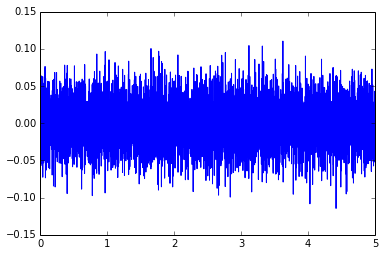

In [26]:
plt.plot(sim.trange(), sim.data[out_probe])

In [27]:
values = sim.data[out_probe]
mean = np.mean(values)
std = np.std(values)
var = np.var(values)

print mean, std, var

-0.000152789306641 0.0315738668923 0.000996909070533


In [28]:
model = nengo.Network("Value spread", seed = 5)
with model:
    inn = nengo.Node([0])
    pop = nengo.Ensemble(100, 1)
    outn= nengo.Node(size_in=1)
    
    nengo.Connection(inn, pop)
    nengo.Connection(pop, outn, synapse=0.5)
    
    out_probe = nengo.Probe(outn)
    
sim = nengo_spinnaker.Simulator(model)
with sim:
    sim.run(5)
values = sim.data[out_probe]
mean = np.mean(values)
std = np.std(values)
var = np.var(values)

print mean, std, var

-0.00693669433594 0.00152092844335 2.31322332978e-06


In [29]:
model = nengo.Network("Value spread", seed = 5)
with model:
    inn = nengo.Node([0])
    pop = nengo.Ensemble(100, 1)
    outn= nengo.Node(size_in=1)
    
    nengo.Connection(inn, pop)
    nengo.Connection(pop, outn, synapse=1)
    
    out_probe = nengo.Probe(outn)
    
sim = nengo_spinnaker.Simulator(model)
with sim:
    sim.run(5)
values = sim.data[out_probe]
mean = np.mean(values)
std = np.std(values)
var = np.var(values)

print mean, std, var

-0.0121266723633 0.00364986149918 1.33214889632e-05


In [30]:
model = nengo.Network("Value spread", seed = 5)
with model:
    inn = nengo.Node([0])
    pop = nengo.Ensemble(100, 1)
    outn= nengo.Node(size_in=1)
    
    nengo.Connection(inn, pop)
    nengo.Connection(pop, outn, synapse=0.1)
    
    out_probe = nengo.Probe(outn)
    
sim = nengo_spinnaker.Simulator(model)
with sim:
    sim.run(5)
values = sim.data[out_probe]
mean = np.mean(values)
std = np.std(values)
var = np.var(values)

print mean, std, var

-0.00157026977539 0.0016278433004 2.64987381067e-06


In [33]:
model = nengo.Network("Value spread", seed = 5)
with model:
    inn = nengo.Node([0])
    pop = nengo.Ensemble(100, 1)
    outn= nengo.Node(size_in=1)
    
    nengo.Connection(inn, pop)
    nengo.Connection(pop, outn, synapse=0.5)
    
    out_probe = nengo.Probe(outn)
    
sim = nengo_spinnaker.Simulator(model)
with sim:
    sim.run(5)
values = sim.data[out_probe]
mean = np.mean(values)
std = np.std(values)
var = np.var(values)
maxi = np.max(values)
mini = np.min(values)

print mean, std, var, maxi, mini

-0.00693669433594 0.00152092844335 2.31322332978e-06 0.000244140625 -0.00888061523438


In [34]:
print maxi - mini

0.00912475585938


In [35]:
interpolation = interp1d([51, 100], [-1,1])

In [37]:
interpolation(75)

array(-0.020408163265306145)

In [38]:
interpolation(80)

array(0.18367346938775508)

In [39]:
interpolation(85)

array(0.3877551020408163)

In [40]:
interpolation(80) - interpolation(75)

0.20408163265306123

In [58]:
t = np.abs(np.asarray([0,0,0]) -  np.asarray([0, 0.3, -.21])) > .2
print t

[False  True  True]


In [53]:
np.any([np.abs(np.asarray([0,0,0]) -  np.asarray([0, 0.3, -.21])) > .2])

True

In [59]:
x = [1, 2, 3]
y = [-1, -2, -3]

In [60]:
[x[i] if t[i] else y[i] for i in range(len(t))]

[-1, 2, 3]